In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Load the world shapefile using GeoPandas
world = gpd.read_file("../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [38]:
# Step 1: Manually specify the directory and filenames
directory = "../data/csv_performance_all_models/"  # Replace with your directory path

# "country_auc_summary_labse_sample.csv"
# "country_auc_summary_small_labse_sample.csv"
# "country_auc_summary_xlmt_sample.csv"
filename = "country_auc_summary_labse_sample.csv"  

# Combine directory path with filenames
file_path = os.path.join(directory, filename)
file_path

'../data/csv_performance_all_models/country_auc_summary_labse_sample.csv'

In [39]:
country_auc_df = pd.read_csv(file_path)
country_auc_df

,country,num_obs,AUC
0,Afghanistan,16,0.733436
1,Brazil,153,0.664727
2,Colombia,26,0.845802
3,Egypt,336,0.626084
4,Iraq,73,0.621421
5,Israel,43,0.687734
6,Jordan,42,0.732566
7,Kenya,45,0.645170
8,Lebanon,163,0.646602
9,Libya,21,0.597222


In [40]:
# Extract unique country names
geo_countries = set(world['NAME'].unique())  # Country names from GeoPandas
dataset_countries = set(country_auc_df['country'].unique())  # Country names from your dataset

# Find common names, names in your dataset but not in GeoPandas, and vice versa
common_countries = geo_countries & dataset_countries  # Intersection
missing_in_geo = dataset_countries - geo_countries  # Countries in dataset but not in GeoPandas
missing_in_dataset = geo_countries - dataset_countries  # Countries in GeoPandas but not in dataset

# Display the results
print("Common Countries:")
print(sorted(common_countries))
print("\nCountries in your dataset but not in GeoPandas:")
print(sorted(missing_in_geo))
print("\nCountries in GeoPandas but not in your dataset:")
print(sorted(missing_in_dataset))

Common Countries:
['Afghanistan', 'Brazil', 'Colombia', 'Egypt', 'Iraq', 'Israel', 'Jordan', 'Kenya', 'Lebanon', 'Libya', 'Mexico', 'Nigeria', 'Pakistan', 'Philippines', 'Syria', 'Thailand', 'Turkey', 'Ukraine', 'Venezuela', 'Yemen']

Countries in your dataset but not in GeoPandas:
['Palestinian Territory']

Countries in GeoPandas but not in your dataset:
['Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'Franc

In [41]:
name_mapping = {
    'Palestinian Territory': 'Palestine',
    'United States': 'United States of America'
}

# Apply mapping
country_auc_df['country'] = country_auc_df['country'].replace(name_mapping)


In [42]:
# Extract unique country names
geo_countries = set(world['NAME'].unique())  # Country names from GeoPandas
dataset_countries = set(country_auc_df['country'].unique())  # Country names from your dataset

# Find common names, names in your dataset but not in GeoPandas, and vice versa
common_countries = geo_countries & dataset_countries  # Intersection
missing_in_geo = dataset_countries - geo_countries  # Countries in dataset but not in GeoPandas

# Display the results
print("Common Countries:")
print(sorted(common_countries))
print("\nCountries in your dataset but not in GeoPandas:")
print(sorted(missing_in_geo))

Common Countries:
['Afghanistan', 'Brazil', 'Colombia', 'Egypt', 'Iraq', 'Israel', 'Jordan', 'Kenya', 'Lebanon', 'Libya', 'Mexico', 'Nigeria', 'Pakistan', 'Palestine', 'Philippines', 'Syria', 'Thailand', 'Turkey', 'Ukraine', 'Venezuela', 'Yemen']

Countries in your dataset but not in GeoPandas:
[]


In [26]:
# Merge the world map with your country-level AUC data
world = world.merge(country_auc_df, how='left', left_on='NAME', right_on='country')

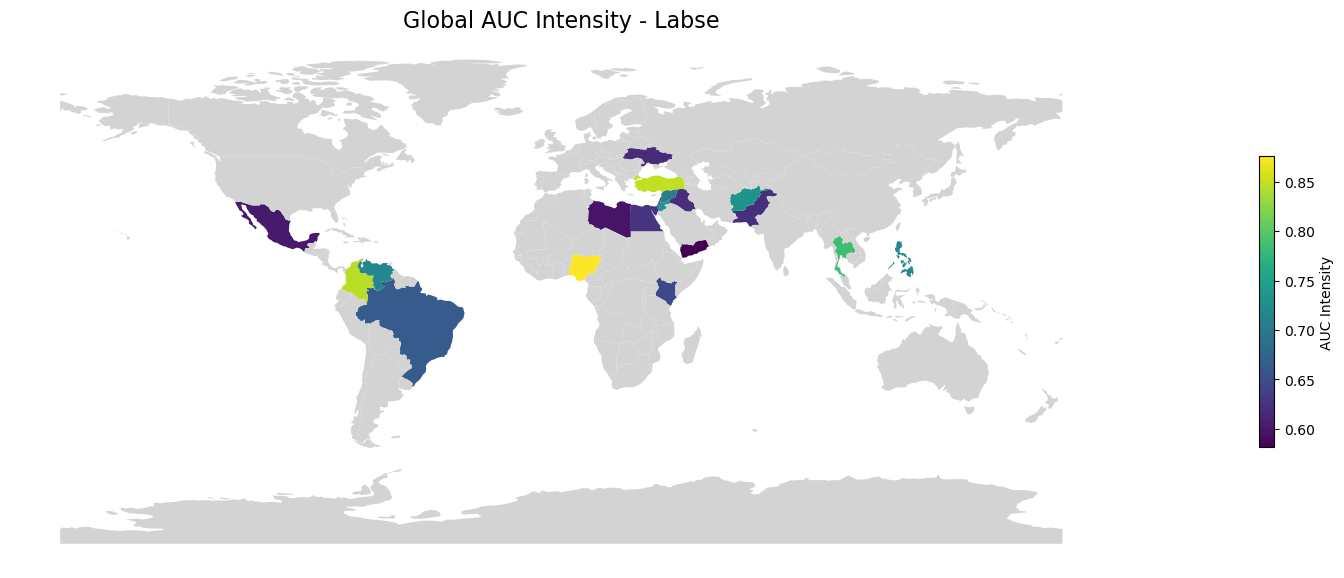

In [27]:
# Plot the map with countries colored by AUC
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(
    column='AUC',  # Column to color by
    cmap='viridis',  # Color map (e.g., 'viridis', 'plasma', etc.)
    legend=True,  # Add a legend
    legend_kwds={
        'label': "AUC Intensity",  # Label for the color bar
        'orientation': "vertical",  # Horizontal color bar
        'shrink': 0.3,  # Scale the size of the color bar
        'pad': 0.1  # Padding between map and legend
    },
    missing_kwds={"color": "lightgrey", "label": "No Data"},
    ax=ax
)

# Position the color bar (legend) in the bottom-left corner
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((0.05, 0.1, 0.4, 0.03))  # (x, y, width, height) in figure coordinates

# Add map labels and title
ax.set_title("Global AUC Intensity - Labse", fontsize=16)
ax.set_axis_off()  # Hide axis

# Adjust layout to make it tight
fig.tight_layout()

In [19]:
# Save the map as a file
fig.savefig("../figures/global_auc_heatmap_labse_sample.jpg", format="jpg", dpi=300)

In [20]:
fig.savefig("../figures/global_auc_heatmap_labse_sample.eps", format='eps')